# Сборный проект

Вы работаете в интернет-магазине ***«Стримчик»***, который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, *Xbox* или *PlayStation*). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

> Необходимо из данных выявить закономерности, влияющие на успешность игры

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

> Нужно научиться отрабатывать такого рода данные, неважно в каком временном интервале

# План работ

- [Шаг №1. Загрузка и изучение данных.](#section_1)

- [Шаг №2.  Предобработка данных.](#section_2)

- [Шаг №3.  Исследовательский анализ данных.](#section_3)

- [Шаг №4.  Составляем портрет пользователя каждого региона.](#section_4)

- [Шаг №5.  Проверка гипотез.](#section_5)

- [Шаг №6.  Общий вывод.](#section_6)

<a id='section_1'></a>

### Шаг №1.  Загрузка и изучение данных

#### Выгружаем необходимые библиотеки

In [1]:
#Блок для импортирования библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

#### Считываем CSV-файлы с данными с помощью библиотеки pandas

In [2]:
#Распаковываем и считываем данные:
try:
    #Выгружаем данные с локальной папки:
    data = pd.read_csv('/datasets/games.csv')
except:
    #Выгружаем данные с сети, если с локальной папки не получилось:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

#### Изучаем общую информацию датафрейма

In [3]:
#Выводим первые 10 строк датафрейма:
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
#Выводим общую информацию о датасете:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


**Итак, мы имеем таблицу, в которой содержится 16715 строк. В датафрейме есть различного рода данные о продаже игр, а именно:**


> Название игры - ***Name***

> Платформа - ***Platform***

> Год выпуска - ***Year_of_Release***

> Жанр - ***Genre***

> Продажи в Северной Америке - ***NA_sales***

> Продажи в Европе - ***EU_sales***

> Продажи в Японии - ***JP_sales***

> Другие продажи (продажи в других странах) - ***Other_sales***

> Оценка игровых критиков - ***Critic_Score***

> Оценка пользователей - ***User_Score***

> рейтинг от организации ***ESRB*** - ***Rating***

**В наборе данных попадается аббревиатура *ESRB (Entertainment Software Rating Board)* — это ассоциация, определяющая возрастной рейтинг компьютерных игр. *ESRB* оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».**

<a id='section_2'></a>

### Шаг №2.  Предобработка данных

#### Названия столбцов

In [5]:
#Приведем все индексы в датасете к нижнему регистру:
data.columns = data.columns.str.lower()

In [6]:
#Выведем их для наглядности изменений:
data.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

#### Изменение типов данных

In [7]:
#Все столбцы data, где есть строковые переменные, приведем к нижнему регистру:
for i in ['name','platform','genre']:
    data[i] = data[i].str.lower()

In [8]:
#Переведем столбец year_of_release к типу int и выведем его уникальные значения:
data['year_of_release'] = data['year_of_release'].astype('Int64', errors='ignore')
data['year_of_release'].unique()

<IntegerArray>
[2006, 1985, 2008, 2009, 1996, 1989, 1984, 2005, 1999, 2007, 2010, 2013, 2004,
 1990, 1988, 2002, 2001, 2011, 1998, 2015, 2012, 2014, 1992, 1997, 1993, 1994,
 1982, 2016, 2003, 1986, 2000, <NA>, 1995, 1991, 1981, 1987, 1980, 1983]
Length: 38, dtype: Int64

#### Определение количества пропусков

In [9]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

#### Обработка пропусков

In [10]:
#Создадим глобальную переменную, в которой сохраним размер строк исходного ДФ:
rows_df = data.shape[0]
#Определим функцию, которая возращает процент пропусов по столбцам и количество удаленных строк:
def check_na():
    #пробегаемся по именам столбцов:
    for i in data.columns:
        #считаем долю пропусков от общего числа:
        perc = (data[i].isna().sum()/rows_df)*100
        print(f'Процент пропусков в {i}: {perc.round(2)}%')
    print()
    #выводим количество удаленных строк:
    print(f'Количество удаленных строк: {rows_df - data.shape[0]}')
    perc2 = ((rows_df - data.shape[0])/rows_df)*100
    #выводим процент удаленных строк:
    print(f'Процент данных, который мы срезали: {perc2:.2f}%')
    pass

#Вызовем функцию сheck_na:
check_na()

In [11]:
#Вызовем функцию сheck_na:
check_na()

Процент пропусков в name: 0.01%
Процент пропусков в platform: 0.0%
Процент пропусков в year_of_release: 1.61%
Процент пропусков в genre: 0.01%
Процент пропусков в na_sales: 0.0%
Процент пропусков в eu_sales: 0.0%
Процент пропусков в jp_sales: 0.0%
Процент пропусков в other_sales: 0.0%
Процент пропусков в critic_score: 51.32%
Процент пропусков в user_score: 40.09%
Процент пропусков в rating: 40.48%

Количество удаленных строк: 0
Процент данных, который мы срезали: 0.00%


Удалим данные, в столбцах ***name***, ***year_of_release***, ***genre***, поскольку процент пропусков в них очень мал:

In [12]:
#Удаляем строки с пропусками в данных столбцах:
for i in ['name','year_of_release','genre']:
    data = data.dropna(subset=[i])

Пропуска в столбцах ***critic_score***, ***user_score*** и ***rating*** оставим пока что без изменений, т.к. процент пропусков слишком большой (40-50%) - заполнять такие данные медианными или средними значениями - **ошибка**.

**Рассмотрим уникальные знаечния:**

In [13]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

*to be determined* (будет определено) - скорей всего это и есть расшифровка ***tbd***. (скоро данные в таблицу будут внесены). Посмотрим количество этих значений в таблице:

In [14]:
data.loc[data['user_score'] == 'tbd', 'user_score'].count()

2376

По сути ***tbd*** - это отсутвие значения, поэтому можно оставить его без изменения, или заменить на nan, давайте так и поступим:

In [15]:
#Заменим tbd на NaN:
data['user_score'] = data['user_score'].replace('tbd', np.nan)

In [16]:
#Теперь можно изменить тип данных - преобразовать столбец с оценкой пользователей к числовому типу float64:
data['user_score'] = pd.to_numeric(data['user_score'])

В случае со столбцом *rating* (в нём категориальные переменные) - можно заменить ***nan*** на ***unknown***:

In [17]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [18]:
#RP - рейтинг ожидается, заменим пропуска, на это значение:
data['rating'] = data['rating'].fillna('RP')

#### Удаление дубликатов

In [19]:
#Проверка на явные дубликаты:
data.duplicated().sum()

0

In [20]:
#Проверка на неявные дубликаты
#Проверка дубликатов по подмножествам 'name','platform','year_of_release','genre':
data.duplicated(['name','platform','year_of_release','genre']).sum()

1

In [21]:
#Удалим этот неявный дубликат:
data = data.drop_duplicates(['name','platform','year_of_release','genre'])

#Выполним повторную проверку на наличие этого дубликата:
data.duplicated(['name','platform','year_of_release','genre']).sum()

0

#### Суммарные продажи

Добавим столбец суммарныхз продаж, со всех регионов, назовем его ***all_sales***:

In [22]:
data['all_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

#### Сводка по предобработанным данным

In [23]:
#Вызовем функцию check_na для проверки:
check_na()

Процент пропусков в name: 0.0%
Процент пропусков в platform: 0.0%
Процент пропусков в year_of_release: 0.0%
Процент пропусков в genre: 0.0%
Процент пропусков в na_sales: 0.0%
Процент пропусков в eu_sales: 0.0%
Процент пропусков в jp_sales: 0.0%
Процент пропусков в other_sales: 0.0%
Процент пропусков в critic_score: 50.62%
Процент пропусков в user_score: 53.73%
Процент пропусков в rating: 0.0%
Процент пропусков в all_sales: 0.0%

Количество удаленных строк: 272
Процент данных, который мы срезали: 1.63%


In [24]:
#Проверим количество пропусков:
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating                0
all_sales             0
dtype: int64

In [25]:
#Изменение общей информации о дс:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16443 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  Int64  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7982 non-null   float64
 9   user_score       7462 non-null   float64
 10  rating           16443 non-null  object 
 11  all_sales        16443 non-null  float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 1.6+ MB


In [26]:
#Выведем первые 10 строк ДФ:
data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,all_sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,NaN,NaN,RP,40.24
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,NaN,NaN,RP,31.38
5,tetris,gb,1989,puzzle,23.20,2.26,4.22,0.58,NaN,NaN,RP,30.26
6,new super mario bros.,ds,2006,platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,wii play,wii,2006,misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,new super mario bros. wii,wii,2009,platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,duck hunt,nes,1984,shooter,26.93,0.63,0.28,0.47,NaN,NaN,RP,28.31


**Результат предобработки:**

- Изменили названия столбцов и типы данных.

- Привели строковые значения к нижнему регистру

- Удалили пропуски, где это было возможно.

- Потеряли **1.63%** от исходного объема данных, что допустимо. (Оптимально 5-10%)

- Определили, что явных дубликатов - **нет**.

- Нашли один неявный дубликат и удалили.

- Подсчитали суммарные продажи со всех регионов для конкретной игры (*all_sales*)

**Причины, которые могли привести к пропускам:**

> Данные выгружались с различных платформ, поэтому пересечение различных типов могло в последсвии привести к пропускам

<a id='section_3'></a>

### Шаг №3.  Исследовательский анализ данных

#### Количество выпущенных игр по годам

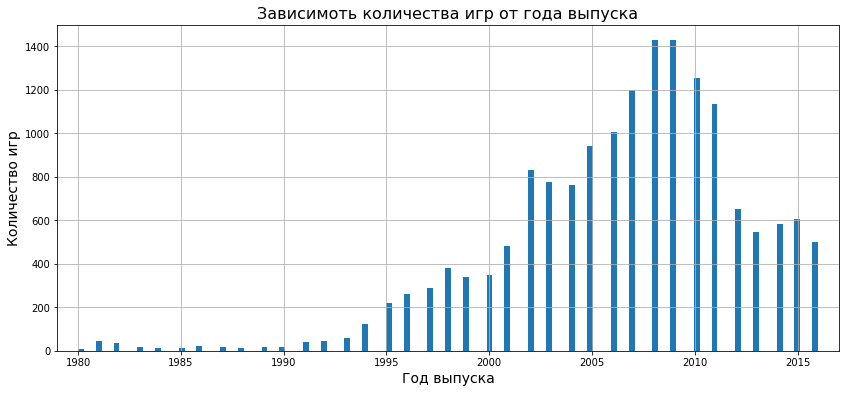

In [27]:
plt.figure(figsize=(14,6))
plt.hist(data['year_of_release'], bins=125, range=(1980,2016))
plt.title('Зависимоть количества игр от года выпуска', fontsize=16)
plt.xlabel('Год выпуска', fontsize=14)
plt.ylabel('Количество игр', fontsize=14)
plt.xlim([1979,2017])
plt.grid()
plt.show()

In [28]:
data['year_of_release'].describe()

count    16443.000000
mean      2006.485921
std          5.875546
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64

In [29]:
data['year_of_release'].mode()[0]

2008

**Мы имеем статистику выпуска количества игр по годам начиная с 1980 и заканчивая 2016 годом. Из данных видно, что начиная с 1993 года увеличивается количество выпускаемых игр. Пик приходится на 2008 год - самое частое значение, которое встречается в данных. После количество выпускаемых игр идет на спад. Анализируя данные дальше, попробуем найти причины этого спада.**

> Интервал выпуска: **1980-2016**

> Интервал возрастания продаж: **1993-2009**

> Интервал спада продаж: **2009-2016**

#### Количество продаж по платформам

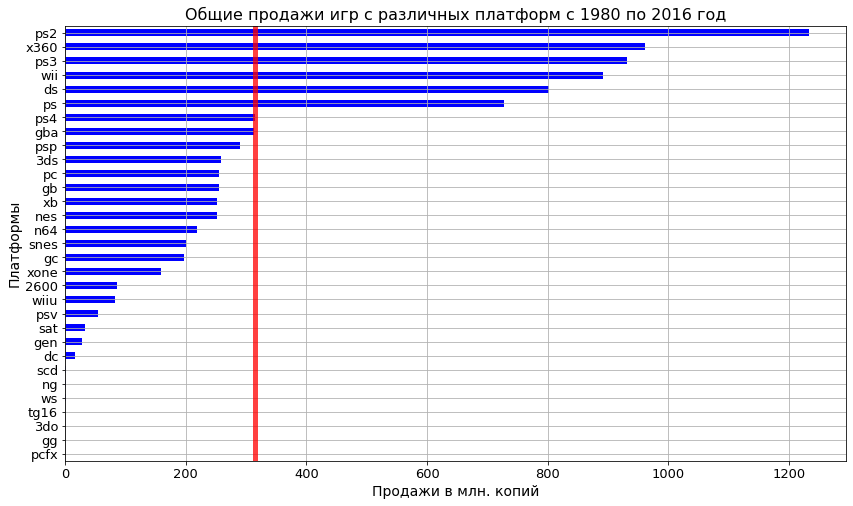

In [30]:
(
data
    .groupby('platform')['all_sales'].sum()
    .sort_values(ascending=True)
    .plot(kind='barh', figsize=(14,8), grid=True, width=0.5, color='Blue', fontsize=13)
    
)
plt.title('Общие продажи игр с различных платформ с 1980 по 2016 год', fontsize=16)
plt.xlabel('Продажи в млн. копий', fontsize=14)
plt.ylabel('Платформы', fontsize=14)
plt.axvline(x=315, lw=5, color='red', alpha=0.75)
plt.show()

Из графика видно, что по количествам продаж имеются явные фавориты. Изучим подробнее только те платформы, которые выходят за порог **красной линии**. Таких платформ шесть, а именно:

> Имеются **6** явно лидирующих платформ

**Рассмотрим график изменения продаж по этим платформам.**

#### Изменение продаж по платформам

In [31]:
#Создадим список из топ 6 платформ:
top = data.groupby('platform')['all_sales'].sum().sort_values(ascending=False).reset_index().head(6)['platform'].to_list()

**С помощью цикла построим графики изменения продаж по платформам из шести топовых:**

In [32]:
#В top - находится список с именами топ 6 платформ
#Определим функцию для вывода графика:
def graph_change():
    for i in top:
        (
        data
        #Берем срез по данной платформе:    
        .query('platform == @i')
        #Группируем данные по годам и суммируем значения продаж по ним:
        .pivot_table(index = 'year_of_release', values = 'all_sales', aggfunc = 'sum')
        .sort_values('year_of_release', ascending = False)['all_sales']
        #Строим график line с именами label = @i:
        .plot(figsize = (16, 7), label=i, grid=True, fontsize=13)
        )
        plt.title('График изменения продаж топ 6 платформ', fontsize=16)
        plt.xlabel('Год выпуска', fontsize=13)
        plt.ylabel('Суммарные продажи', fontsize=13) 
        plt.legend()
        pass

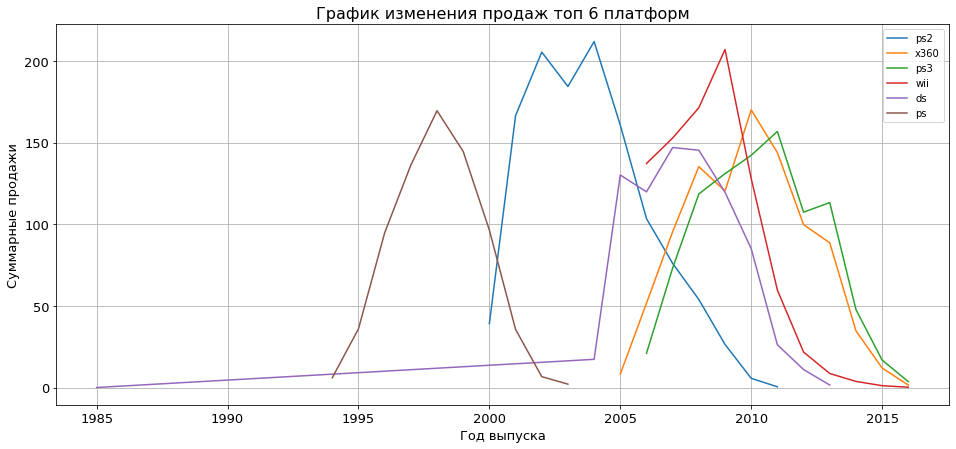

In [33]:
#Вызовем функцию:
graph_change()

Сразу бросается в глаза длительность продаж игр с платформы ***ds***. Посмотрим значение в 1985 году для этой платформы более детально:

In [34]:
#Отсортируем значения по годам и посмотрим закономерности:
data.query('platform=="ds"')['year_of_release'].sort_values()

15957    1985
13463    2004
11517    2004
4421     2004
7902     2004
         ... 
7460     2013
14716    2013
7993     2013
3862     2013
5054     2013
Name: year_of_release, Length: 2121, dtype: Int64

In [35]:
#Значение в строке 15957 - это аномалия, от которой следует избавиться, тогда данные будут браться начиная с 2004 года:
data.loc[15957]

name               strongest tokyo university shogi ds
platform                                            ds
year_of_release                                   1985
genre                                           action
na_sales                                           0.0
eu_sales                                           0.0
jp_sales                                          0.02
other_sales                                        0.0
critic_score                                       NaN
user_score                                         NaN
rating                                              RP
all_sales                                         0.02
Name: 15957, dtype: object

In [36]:
#Удалим соответсвующую строку из дф:
data = data.drop(15957)
#Выполним проверку на наличие:
data.query('platform=="ds"')['year_of_release'].sort_values()

4421     2004
13095    2004
11517    2004
6580     2004
14161    2004
         ... 
9753     2013
14353    2013
7460     2013
14716    2013
5054     2013
Name: year_of_release, Length: 2120, dtype: Int64

#### Определение актуального периода существования платформ

Итак, мы избавились от аномалии в данных, теперь график принимает вид:

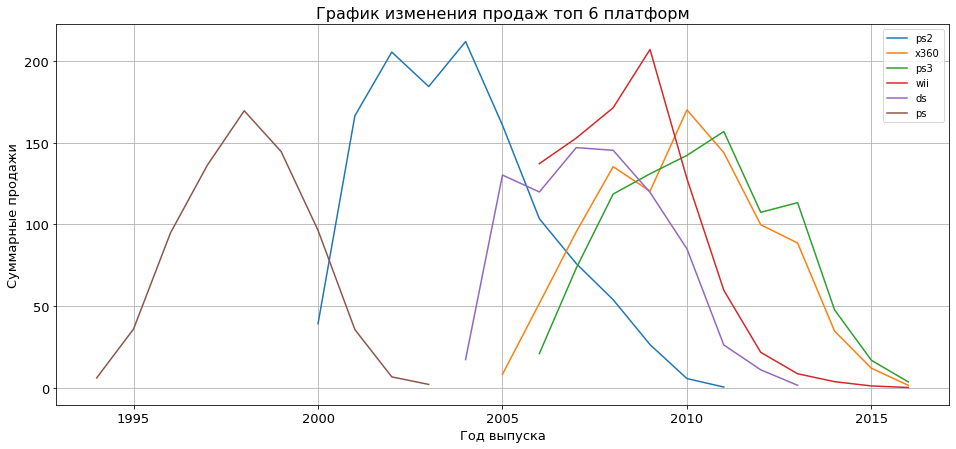

In [37]:
#Снова вызовем функцию graph_change() и посмотрим как изменились данные без аномалии:
graph_change()

In [38]:
#Cоздадим пустые переменные - счетчики:
sum_life = 0
sum_up = 0
sum_down = 0
#C помощью цикла определим Среднее время жизни платформы, время подъема и спада:
for j in top:
    #считаем время жизни каждой платформы:
    time_life = data.query('platform == @j')['year_of_release'].max() - data.query('platform == @j')['year_of_release'].min()
    k = (data
    .query('platform == @j')
    .pivot_table(index = 'year_of_release', values = 'all_sales', aggfunc = 'sum')
    .sort_values('all_sales', ascending=False)
    .reset_index()
    ['year_of_release'].values[0]   
    ) 
    #Время подъема продаж каждой платформы:
    up = k - data.query('platform == @j')['year_of_release'].min()
    #Время спада продаж каждой платформы:
    down =  data.query('platform == @j')['year_of_release'].max() - k
    #Счетчики для определения среднего:
    sum_life += time_life
    sum_up += up
    sum_down += down
    print(f'Время жизни платформы "{j}": {time_life} | Подъем в интервале: {up} | Спад в интервале: {down}')
#Выводим среднее значение:
print()
print(f'''Ср.время жизни платформы: {int(sum_life/len(top))} лет
Ср.подъем: {int(sum_up/len(top))} года
Ср.спад: {int(sum_down/len(top))} лет''')

Время жизни платформы "ps2": 11 | Подъем в интервале: 4 | Спад в интервале: 7
Время жизни платформы "x360": 11 | Подъем в интервале: 5 | Спад в интервале: 6
Время жизни платформы "ps3": 10 | Подъем в интервале: 5 | Спад в интервале: 5
Время жизни платформы "wii": 10 | Подъем в интервале: 3 | Спад в интервале: 7
Время жизни платформы "ds": 9 | Подъем в интервале: 3 | Спад в интервале: 6
Время жизни платформы "ps": 9 | Подъем в интервале: 4 | Спад в интервале: 5

Ср.время жизни платформы: 10 лет
Ср.подъем: 4 года
Ср.спад: 6 лет


Итак, среднее время жизни платформы составляет **10 лет**. Средний период подъема - **4 года**. Средний период спада - **6 лет**. Исходя из этих данных, можем определить **актуальный период**. Нужно учесть, что мы рассматриваем **перспективные** платформы, которые растут, следовательно, если мы хотим сделать прогноз на 2017 год, нужно взять данные **за последние 4 года**, а именно **с 2012 по 2016 год**. Это и будет актуальные период.

> Актуальный период - **последние 4 года**

#### Актуальные платформы. Какие растут/падают?

**Выведем все платформы и посмотрим, какие на пике/спаде:**

In [39]:
top_all = data.groupby('platform')['all_sales'].sum().sort_values(ascending=False).reset_index()['platform'].to_list()

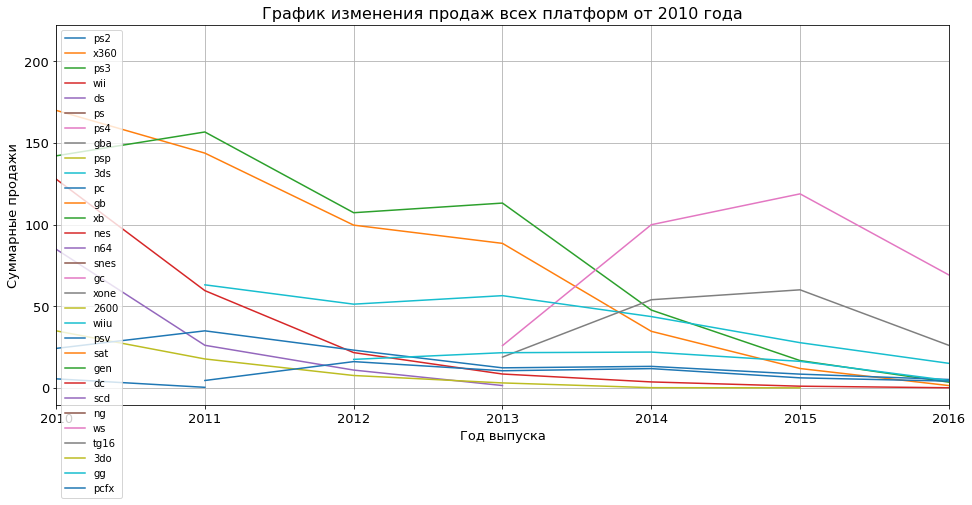

In [40]:
for i in top_all:
    (
    data
    .query('platform == @i')
    .pivot_table(index = 'year_of_release', values = 'all_sales', aggfunc = 'sum')
    .sort_values('year_of_release', ascending = False)['all_sales']
    .plot(figsize = (16, 7), label=i, grid=True, fontsize=13)
     )
plt.title('График изменения продаж всех платформ от 2010 года', fontsize=16)
plt.xlim([2010,2016])
plt.xlabel('Год выпуска', fontsize=13)
plt.ylabel('Суммарные продажи', fontsize=13) 
plt.legend()
plt.show()

Исходя из данных графика на пике находятся такие платформы как ***ps4*** и ***xone***. Данные платформы на рынке уже **3 года**, исходя из средней продолжительности подъема платформ (4 года), можно прогназировать, что продажи данных платформ будут расти еще в течении года. Остальные платформы идут на спад, время, когда они были актуальны - проходит.

> ***ps4*** и ***xboxone*** - платформы с возможной перспективой роста в течении еще одного года

> Спад в конце для перпективных платформ может быть связан с неполнотой данных за 2016 год (он еще не закончился) 

> Остальные платформы плавно идут на спад

#### "Ящики с усами" по глобальным продажам

Построим boxplot'ы по всем платформам, в зависимости от суммарных продаж:

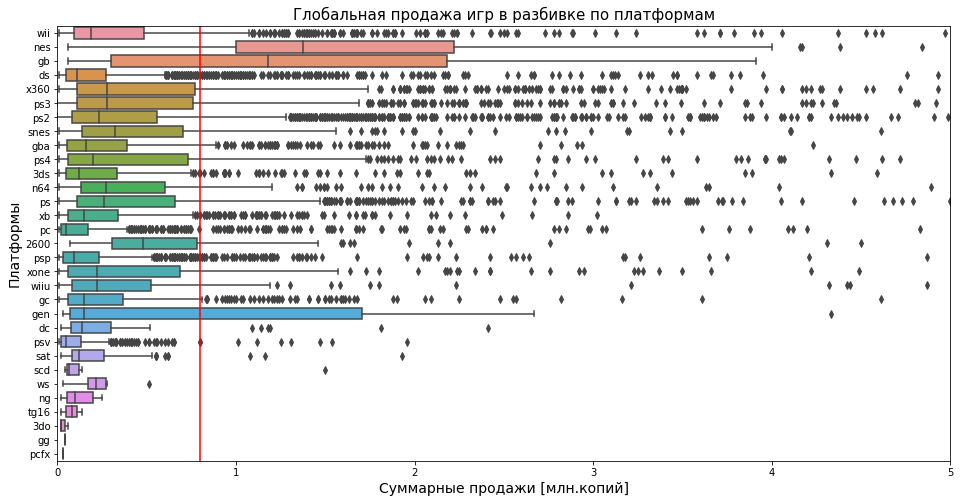

In [41]:
plt.figure(figsize=(16,8))
sns.boxplot(data=data, x='all_sales', y='platform')
plt.xlim([0,5])
plt.title('Глобальная продажа игр в разбивке по платформам', fontsize=15)
plt.xlabel('Суммарные продажи [млн.копий]', fontsize=14)
plt.axvline(x=0.8, color='red')
plt.ylabel('Платформы',fontsize=14)
plt.show()

Почти все платформы - имеют выбросы. Самые большие **"межквартильные размахи"** имеют платформы ***gen***, ***nes*** и ***gb***, стоит заметить, что для этих платформ выбросов по сравнению с другими - **в разы меньше**. Это говорит о том, что большенство значений для этих платформ сконцентрированно в диапозоне размаха усов (т.е. имеет низкую плотность продаж и большой разброс). Остальные **межквартильные размахи** платформ не привышают значения **0.8 (красная линия)**, имеют большое количество выбросов и высокую плотность продаж.

Такой график мало информативен, построим тоже самое, только для **актуального периода** в приближенном масштабе:

In [42]:
#Создадим новый ДФ - за актуальный период, который хранит данные от 2012 года:
actual_data = data.query('year_of_release >=2012')

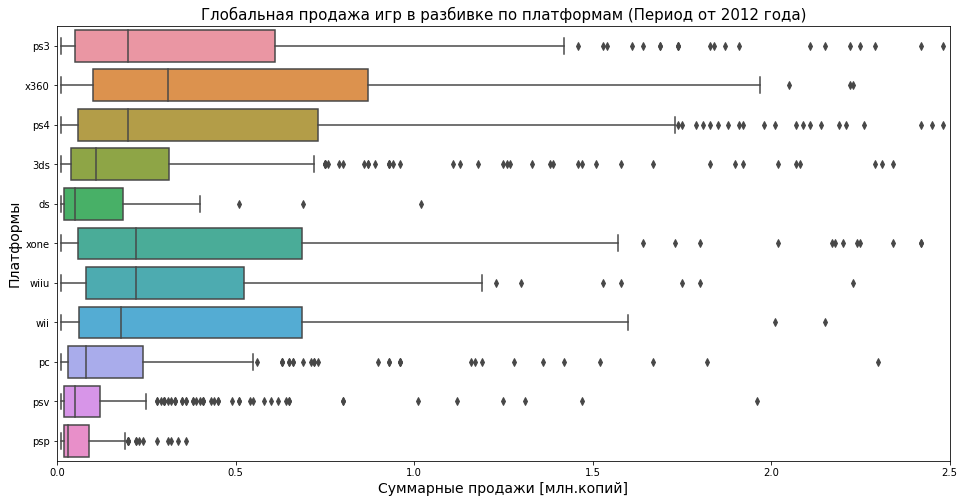

In [43]:
plt.figure(figsize=(16,8))
sns.boxplot(data=actual_data, x='all_sales', y='platform')
plt.xlim([0,2.5])
plt.title('Глобальная продажа игр в разбивке по платформам (Период от 2012 года)', fontsize=15)
plt.xlabel('Суммарные продажи [млн.копий]', fontsize=14)
plt.ylabel('Платформы',fontsize=14)
plt.show()

За актуальный период от 2012 года сократилось количество рассматриваемых игровых платформ. Можно выделить шесть основных фаворитов по разбросу продажам: ***sp3, x360, ps4, xone, wiiu, wii***. Медиана продаж всех платформ от 2012 года не привышает 0.3.

> Все платформы имеют выбросы

> Наибольший разброс по продажам за все время имеют консоли: ***gen***, ***nes*** и ***gb***

> За **актуальный период** по разбросу продаж можно выделить шесть фаворитов: ***ps3, x360, ps4, xone, wiiu, wii***

> **Медиана** продаж всех платформ от 2012 года не привышает **0.3**.

#### Влияние отзывов на продажи

##### Общая корреляция

Рассмотрим **корреляцию** (взаимосвязь) между оценками пользователей, критиков и продажами за время **актуального периода**:

In [44]:
actual_data.corr().style.format("{:,.2f}")

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,all_sales
year_of_release,1.00,-0.09,-0.05,-0.06,-0.06,0.02,-0.02,-0.08
na_sales,-0.09,1.00,0.77,0.27,0.79,0.29,-0.01,0.92
eu_sales,-0.05,0.77,1.00,0.27,0.94,0.28,-0.02,0.93
jp_sales,-0.06,0.27,0.27,1.00,0.20,0.12,0.16,0.45
other_sales,-0.06,0.79,0.94,0.20,1.00,0.27,-0.01,0.91
critic_score,0.02,0.29,0.28,0.12,0.27,1.00,0.52,0.31
user_score,-0.02,-0.01,-0.02,0.16,-0.01,0.52,1.00,0.00
all_sales,-0.08,0.92,0.93,0.45,0.91,0.31,0.00,1.00


Корреляция между оценкой критика и продажами составляет **0.31**; Корреляции между оценкой пользователя и продажами - **нет**.

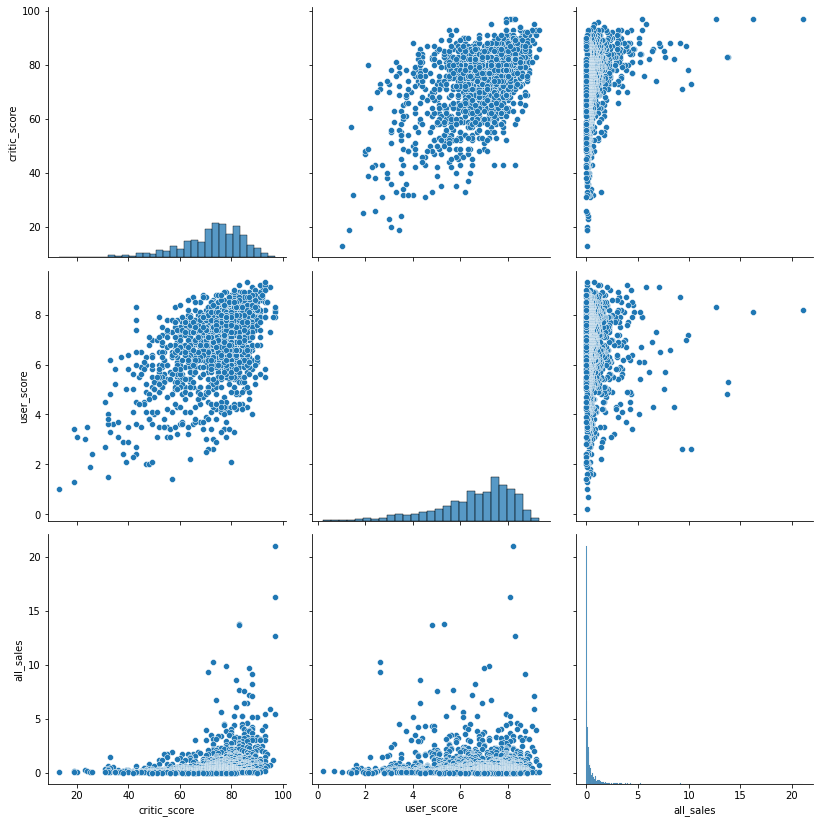

In [45]:
#Выведем диаграммы рассеяния для всех трех значений (главная диагональ показывает корреляцию значения от себя):
sns.pairplot(actual_data[['critic_score', 'user_score', 'all_sales']])
plt.gcf().set_size_inches(12,12)
plt.show()

Никакой сильной взаимосвязи не прослеживается между оценкой пользователя/критика и продажами. Исходя из числовых данных взаимосвязь между оценкой пользователя и продажами почти такая же, как и между оценками критиков и продажами.

> Сильной взаимосвязи не наблюдается

> Корреляция оценки пользователя и продаж: **- 0.15**

> Корреляция оценки критика и продаж: **-0.23**

##### Корреляция по конкретным платформам

**Корреляция мужду оценкой пользователя и продажами:**

In [46]:
#Создадим список из топ 6 платформ за актуальный период:
actual_top_6 = (actual_data    
    .pivot_table(index='platform', values='all_sales', aggfunc='sum')
    .sort_values(by='all_sales', ascending=False)
    .reset_index().head(6)['platform'].tolist()
    )                         
actual_top_6

['ps4', 'ps3', 'x360', '3ds', 'xone', 'wiiu']

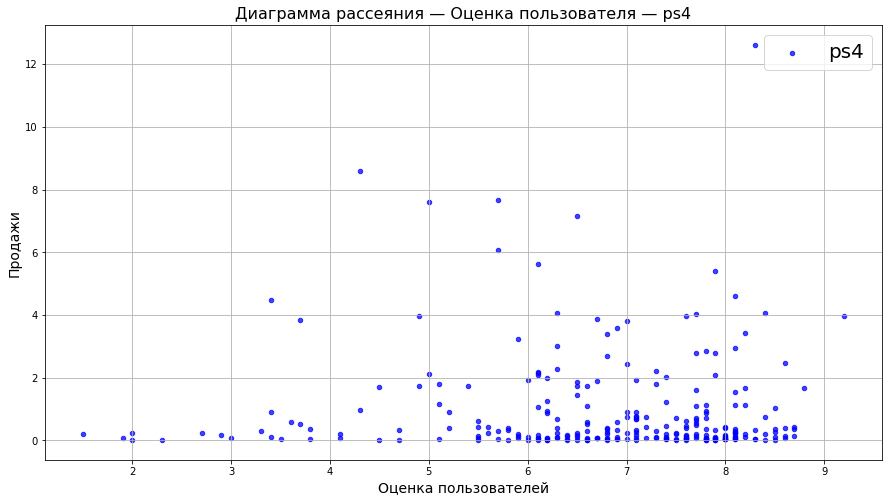

Корреляция между оценкой пользователя и продажей для платформы ps4: -0.031957110204556376



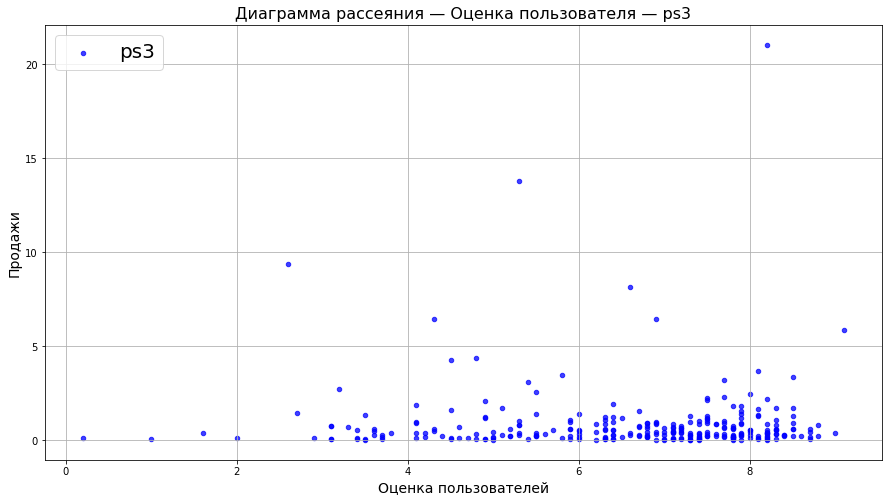

Корреляция между оценкой пользователя и продажей для платформы ps3: -0.006205767686051523



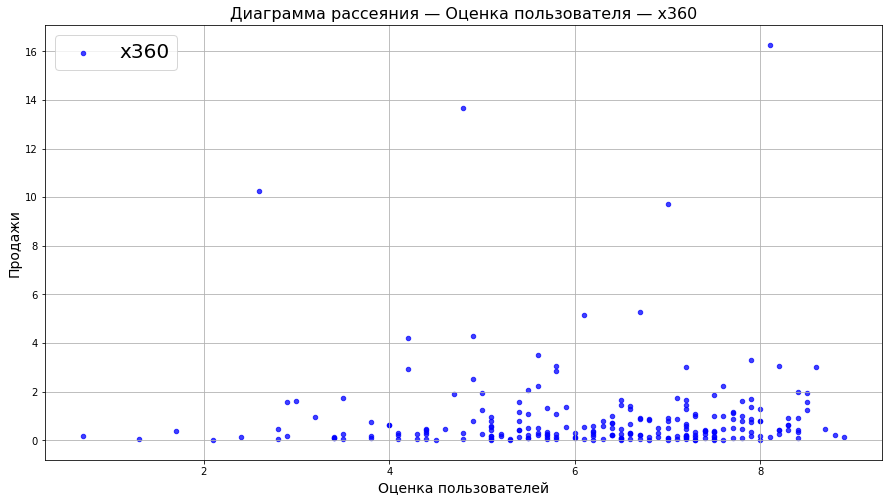

Корреляция между оценкой пользователя и продажей для платформы x360: 0.006163978646213326



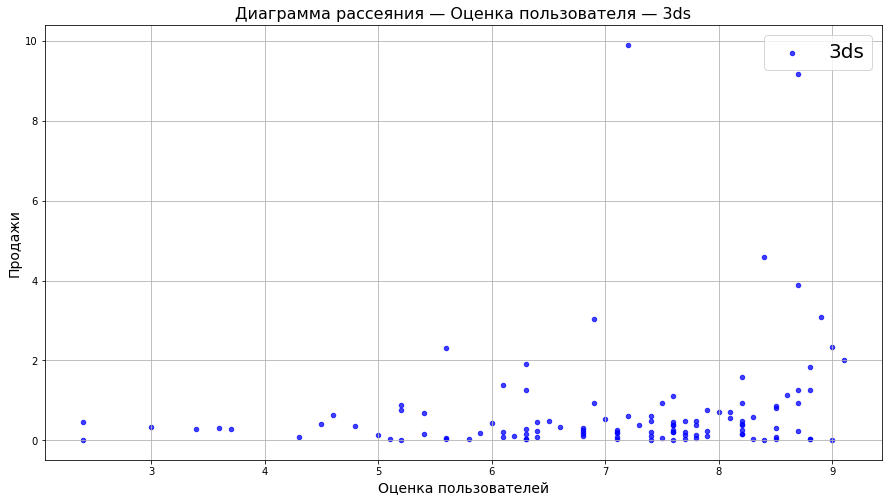

Корреляция между оценкой пользователя и продажей для платформы 3ds: 0.19758263411038599



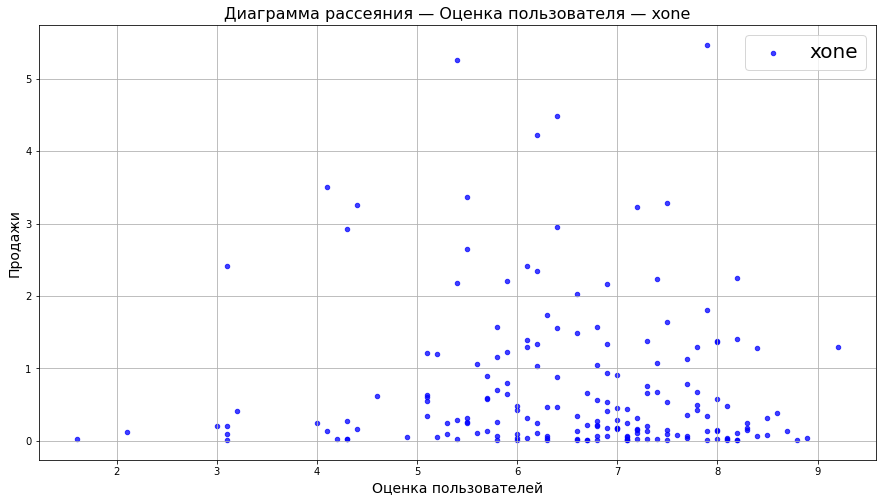

Корреляция между оценкой пользователя и продажей для платформы xone: -0.06892505328279414



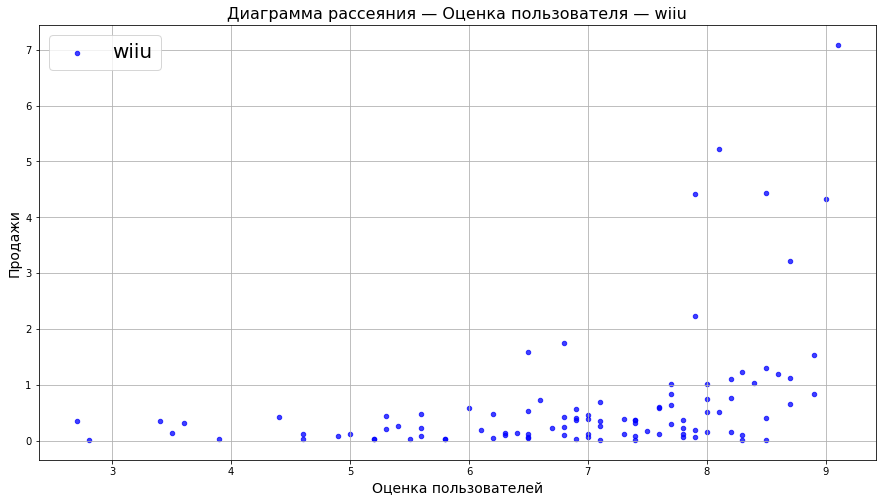

Корреляция между оценкой пользователя и продажей для платформы wiiu: 0.4002190202148617



In [47]:
for i in actual_top_6:
    actual_data.query('platform==@i').plot(kind='scatter', y='all_sales', 
                                                   x='user_score', alpha=0.75, subplots=True, figsize=(15,8), c = 'b', s = 20)
    plt.title(f'Диаграмма рассеяния — Оценка пользователя — {i}', fontsize=16)
    plt.xlabel('Оценка пользователей', fontsize=14)
    plt.ylabel('Продажи', fontsize=14)
    plt.legend([i], fontsize=20)
    plt.grid()
    plt.show()
    print(f'''Корреляция между оценкой пользователя и продажей для платформы {i}: {actual_data
.query('platform==@i')['user_score'].corr(actual_data.query('platform==@i')['all_sales'])}''')
    print()

**Корреляция между оценкой критика и продажами:**

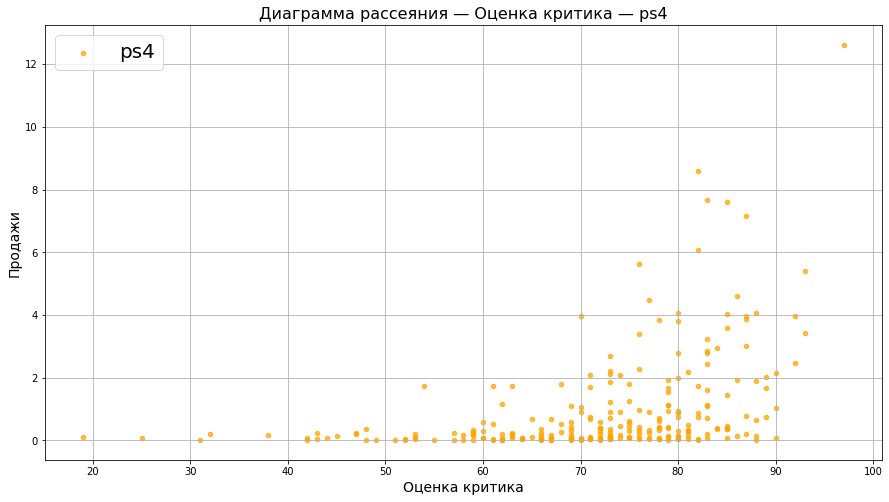

Корреляция между оценкой пользователя и продажей для платформы ps4: 0.40656790206178095



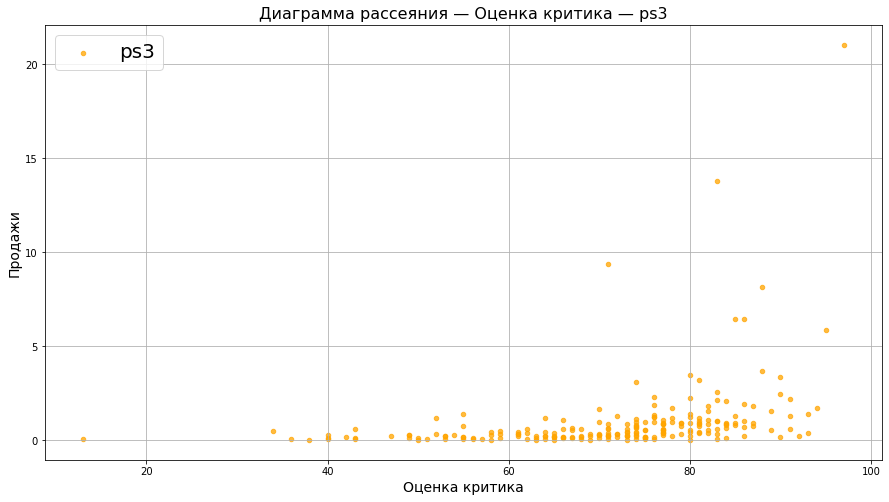

Корреляция между оценкой пользователя и продажей для платформы ps3: 0.3341517575509856



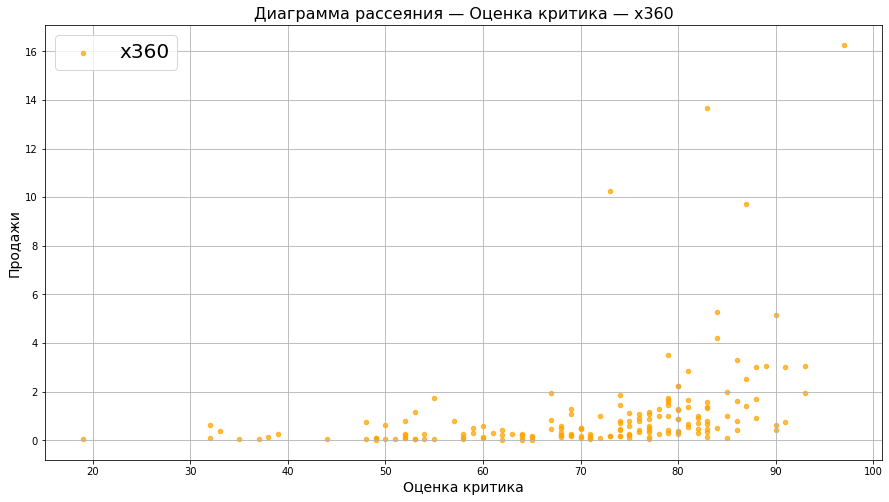

Корреляция между оценкой пользователя и продажей для платформы x360: 0.3605734888507336



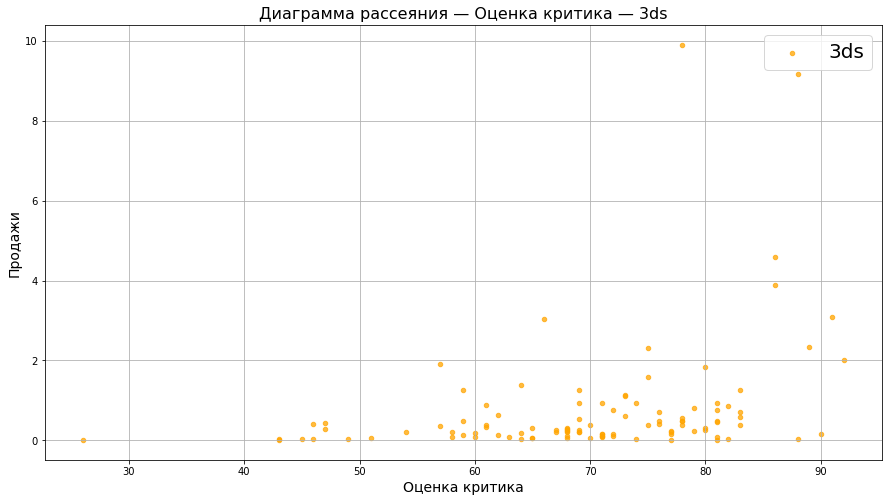

Корреляция между оценкой пользователя и продажей для платформы 3ds: 0.3208028695360785



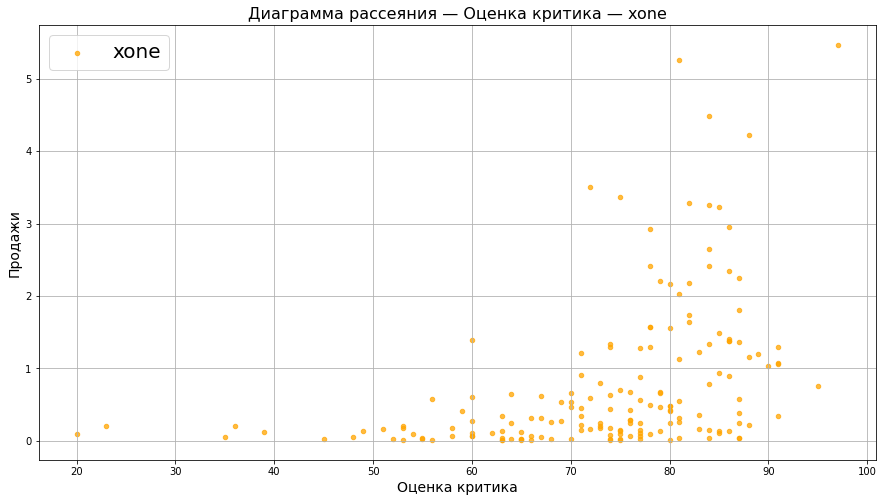

Корреляция между оценкой пользователя и продажей для платформы xone: 0.4169983280084017



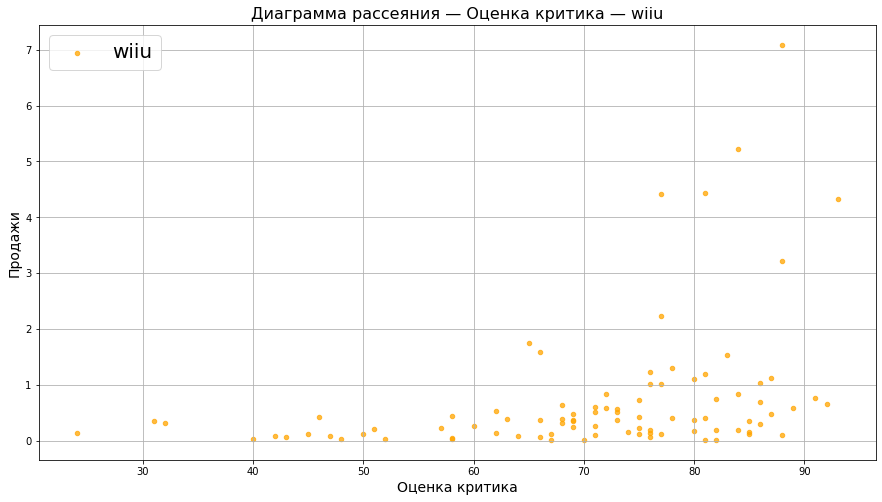

Корреляция между оценкой пользователя и продажей для платформы wiiu: 0.34837976012017485



In [48]:
for i in actual_top_6:
    actual_data.query('platform==@i').plot(kind='scatter', y='all_sales', 
                                            x='critic_score', alpha=0.75, subplots=True, figsize=(15,8), c = 'orange', s = 20)
    plt.title(f'Диаграмма рассеяния — Оценка критика — {i}', fontsize=16)
    plt.xlabel('Оценка критика', fontsize=14)
    plt.ylabel('Продажи', fontsize=14)
    plt.legend([i], fontsize=20)
    plt.grid()
    plt.show()
    print(f'''Корреляция между оценкой пользователя и продажей для платформы {i}: {actual_data
.query('platform==@i')['critic_score'].corr(actual_data.query('platform==@i')['all_sales'])}''')
    print()

**Общий вывод по корреляции:**

- Общая корреляция:

> Корреляция  между оценками пользователя/критика и продажами прослеживается плохо

> Для группы оценка пользователя/продажи она корреляция: **- 0.003**, можно сказать, что её нет

> Для группы оценка критика/продажи корреляция равна: **- 0.31**

- Корреляция по конкретным платформам:

> Корреляция по конкретным платформам для **оценки пользователя** коллеблится вовкруг минимальных значений: **~0.03**. Ее также можно сказать, что нет.

> Корреляция по конкретным платформам для **оценки критика** коллеблится в интервале: **0.32 ~ 0.41** (преобладают большие значения)

---

Подводя итоги, можно сказать, что рассматривая конкретные платформы, **корреляция продаж имеет среднюю взаимосвязь с оценкой критика**, и **не имеют взаимосвязь** с оценкой пользователя.


#### Распределение игр по жанрам

In [49]:
#Общее распределение игр по жанрам отсортированным по продажам:
data.groupby('genre')['all_sales'].sum().sort_values(ascending=False)

genre
action          1716.50
sports          1309.66
shooter         1041.36
role-playing     931.08
platform         825.55
misc             790.29
racing           723.49
fighting         442.66
simulation       387.96
puzzle           239.89
adventure        233.33
strategy         172.57
Name: all_sales, dtype: float64

**Самые популярные категории - это действия, спортивные игры и шутеры(стрелялки), по данным за все время**

In [50]:
#Теперь рассмотрим актуальный период:
actual_data.groupby('genre')['all_sales'].sum().sort_values(ascending=False)

genre
action          441.12
shooter         304.73
role-playing    192.80
sports          181.06
misc             85.04
platform         61.00
racing           53.50
fighting         44.49
simulation       35.12
adventure        29.43
strategy         13.34
puzzle            4.89
Name: all_sales, dtype: float64

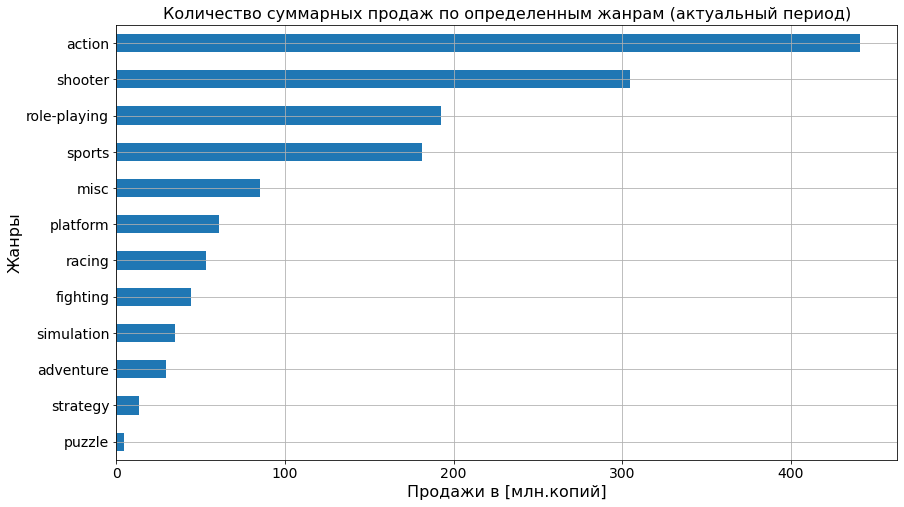

In [51]:
#Построим столбчатую гистограмму суммарных продаж по определенным жанрам:
plt.figure(figsize=(14,8))
(
actual_data
    .groupby('genre')['all_sales'].sum()
    .sort_values(ascending=True)
    .plot(kind='barh', fontsize=14)
)
plt.title('Количество суммарных продаж по определенным жанрам (актуальный период)', fontsize=16)
plt.xlabel('Продажи в [млн.копий]', fontsize=16)
plt.ylabel('Жанры', fontsize=16)
plt.grid()
plt.show()

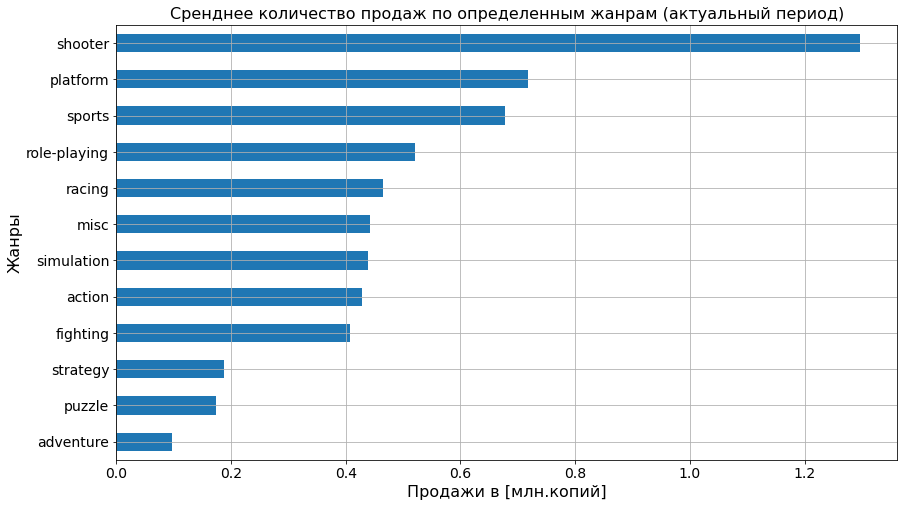

In [52]:
#Построим столбчатую гистограмму среднего количества продаж по определенным жанрам:
plt.figure(figsize=(14,8))
(
actual_data
    .groupby('genre')['all_sales'].mean()
    .sort_values(ascending=True)
    .plot(kind='barh', fontsize=14)
)
plt.title('Сренднее количество продаж по определенным жанрам (актуальный период)', fontsize=16)
plt.xlabel('Продажи в [млн.копий]', fontsize=16)
plt.ylabel('Жанры', fontsize=16)
plt.grid()
plt.show()

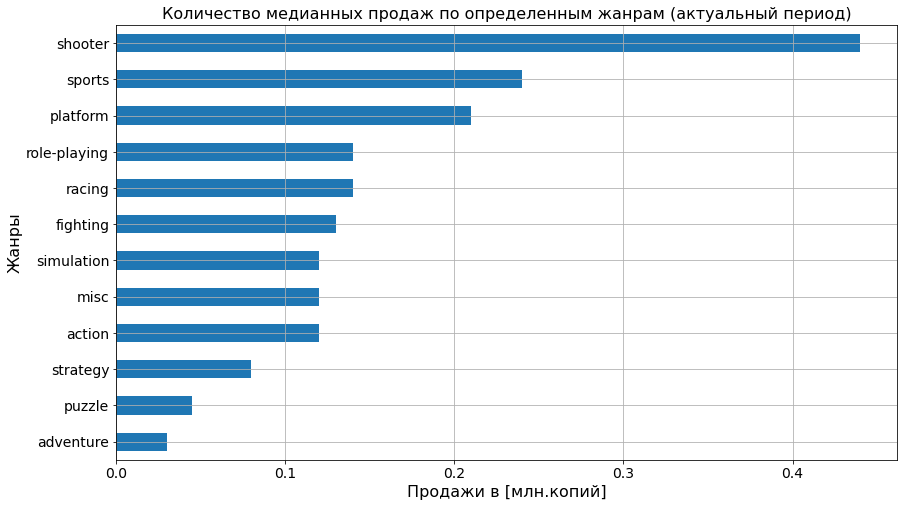

In [53]:
#Построим столбчатую гистограмму медианных продаж по определенным жанрам:
plt.figure(figsize=(14,8))
(
actual_data
    .groupby('genre')['all_sales'].median()
    .sort_values(ascending=True)
    .plot(kind='barh', fontsize=14)
)
plt.title('Количество медианных продаж по определенным жанрам (актуальный период)', fontsize=16)
plt.xlabel('Продажи в [млн.копий]', fontsize=16)
plt.ylabel('Жанры', fontsize=16)
plt.grid()
plt.show()

**В основной концепции данные не поменялись, топ 4 остался неизменным по типу игр, поменялся только порядок, теперь топ 2 занимают шутеры, топ 3 - ролевые игры, а спортивные игры ушли со второго места на четвертое.**

> Первое место занимает жанр **Actions** - за все время

> Второе место занимает жанр **Shooter** - актульный период

> Третье место делят между собой **role-playing** и **sports** - актульный период

Но если рассматривать не суммарные значения по суммарным проданным жанрам, можно исключить влияние игр **бестселлеров**. Как видно из графиков **средних и медианных суммарных продаж**, отсортированные позиции по продажам поменялись.


> Жанр **action** провалился с топ1 позиции на 8 место для средних суммарных продаж, и на 9 место для медианных суммарных продаж

> Жанры **Shooter**, **sports** и **role-playing** все также остались в топе

> Вместо **action** в топ вошел такой жанр как **platform** (платформер — жанр компьютерных игр, в которых основу игрового процесса составляют прыжки по платформам). Он занимает топ2 для средних и топ 3 для медианных суммарных продаж

**Результат исследовательского анализа данных:**

- Определили количество выпущенных игр по годам

- Определили топ игровых платформ по продажам за все время

- Оценили как менялись продажи в зависимости от платформ за определенные временные интервалы. Исходя из этих данных определили **среднее время жизини платформы и спрогнозировали перспективные платформы**

- Задали **"Актуальный интервал"** - временной интервал, исходя из которого стоит проводить оценку. (**последние 4 года**)

- **Построили боксплоты**, по которым оценили разброс значений для конкретных платформ и их выбросы

- Проанализировали взаимосвязь оценок пользователя/критика и продаж для актуального периода. Сделали выводы о том, что **оценка критика средне влияет на продажи**

- Рассмотрели распределение суммарных, средних и медианных продаж по определенным жанрам. Сделали выводы о востребованных игровых жанрах.

<a id='section_4'></a>

### Шаг №4.  Составляем портрет пользователя каждого региона

#### Самые популярные платформы по различным регионам

In [54]:
#Рассмотрим продажи топ5 платформ за актуальный период СА:
na = (actual_data
    .pivot_table(index='platform', values='na_sales', aggfunc='sum')
    .sort_values(by='na_sales', ascending=False)
    .head(5)
    .reset_index()
     )
na['na_percent_sales'] = ((na['na_sales']/na['na_sales'].sum())*100).round(2)
na.columns=['na_platform','na_sales','na_percent_sales']
#Вызов na:
na

,na_platform,na_sales,na_percent_sales
0,x360,140.05,27.98
1,ps4,108.74,21.72
2,ps3,103.38,20.65
3,xone,93.12,18.60
4,3ds,55.31,11.05


In [55]:
#Рассмотрим продажи топ5 платформ за актуальный период Европы:
eu = (actual_data
    .pivot_table(index='platform', values='eu_sales', aggfunc='sum')
    .sort_values(by='eu_sales', ascending=False)
    .head(5)
    .reset_index()
     )
eu['eu_percent_sales'] = ((eu['eu_sales']/eu['eu_sales'].sum())*100).round(2)
eu.columns=['eu_platform','eu_sales','eu_percent_sales']
#Вызов eu:
eu

,eu_platform,eu_sales,eu_percent_sales
0,ps4,141.09,33.86
1,ps3,106.85,25.64
2,x360,74.52,17.88
3,xone,51.59,12.38
4,3ds,42.64,10.23


In [56]:
#Рассмотрим продажи топ5 платформ за актуальный период Японии:
jp = (actual_data
    .pivot_table(index='platform', values='jp_sales', aggfunc='sum')
    .sort_values(by='jp_sales', ascending=False)
    .head(5)
    .reset_index()
     )
jp['jp_percent_sales'] = ((jp['jp_sales']/jp['jp_sales'].sum())*100).round(2)
jp.columns=['jp_platform','jp_sales','jp_percent_sales']
#Вызов jp:
jp

,jp_platform,jp_sales,jp_percent_sales
0,3ds,87.79,50.72
1,ps3,35.29,20.39
2,psv,21.04,12.16
3,ps4,15.96,9.22
4,wiiu,13.01,7.52


**Визуализируем полученную информацию:**

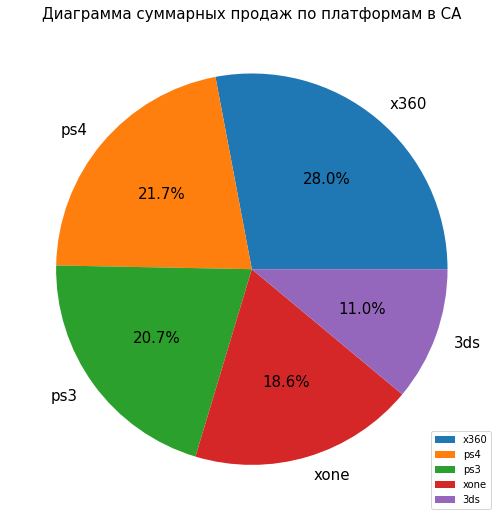

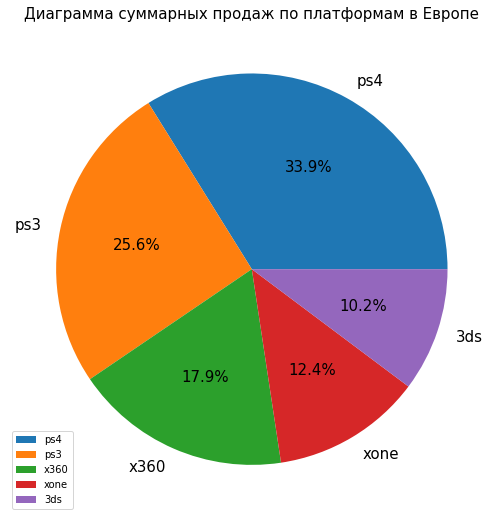

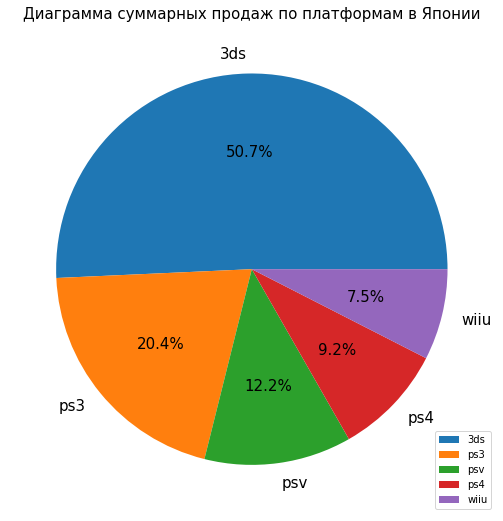

In [75]:
#Построение круговой диаграммы для СА:
(actual_data
    .pivot_table(index='platform', values='na_sales', aggfunc='sum')
    .sort_values(by='na_sales', ascending=False)
    .head(5)
    .plot(kind='pie', figsize=(9,9), autopct='%1.1f%%', fontsize=15, subplots=True)
    )
plt.title('Диаграмма суммарных продаж по платформам в СА', size=15)
plt.ylabel('')

#Построение круговой диаграммы для Европы:
(actual_data
    .pivot_table(index='platform', values='eu_sales', aggfunc='sum')
    .sort_values(by='eu_sales', ascending=False)
    .head(5)
    .plot(kind='pie', figsize=(9,9), autopct='%1.1f%%', fontsize=15, subplots=True)
    )
plt.title('Диаграмма суммарных продаж по платформам в Европе', size=15)
plt.ylabel('')

#Построение круговой диаграммы для Японии:
(actual_data
    .pivot_table(index='platform', values='jp_sales', aggfunc='sum')
    .sort_values(by='jp_sales', ascending=False)
    .head(5)
    .plot(kind='pie', figsize=(9,9), autopct='%1.1f%%', fontsize=15, subplots=True)
    )
plt.title('Диаграмма суммарных продаж по платформам в Японии', size=15)
plt.ylabel('')
plt.show()

**Объединим данные в одну таблицу для большей наглядности:**

In [58]:
#Объединим маленькие таблицы в одну и уберем ненужные столбцы:
reg_all = na.join(eu)
reg_all = reg_all.join(jp)
del reg_all['na_sales'], reg_all['eu_sales'], reg_all['jp_sales']
#Вызовем итоговый дф:
reg_all

,na_platform,na_percent_sales,eu_platform,eu_percent_sales,jp_platform,jp_percent_sales
0,x360,27.98,ps4,33.86,3ds,50.72
1,ps4,21.72,ps3,25.64,ps3,20.39
2,ps3,20.65,x360,17.88,psv,12.16
3,xone,18.60,xone,12.38,ps4,9.22
4,3ds,11.05,3ds,10.23,wiiu,7.52


Мы рассмотрели данные из трех регионов, сделаем определенные умозаключения:

> **Пользователи СА** активно использут платформу **x360** **~28%** от всех продаж из топ 5 (платформ), также порядка **~20%** занимает каждая из платформ **ps4** и **ps3**

> В случае с **пользователями Европы** платформы **sony** (ps4, ps3) - занимают **~34%**и **26%** рынка, но платформы **xbox**(x360, xone) - также имеют хорошие показатели - **18%** и **12%**, но меньше, по сравнению с СА.

> В **Японии** пользователи отличаются, они используют **nintendo 3ds** - это портативная приставка, которая занимает почти **~51%** рынка. Если сравнивать с Европой и СА, у которых эта приставка на последнем месте в рейтенге топ5, то в Японии она на первом месте по продажам. Продукты **sony** занимают **~42%** рынка, что также не мало. 

#### Самые популярные жанры по различным регионам

**Выберем топ 5 жанром в различных регионах:**

- **Северная Америка:**

In [59]:
actual_data.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head(5)

genre
action          177.84
shooter         144.77
sports           81.53
role-playing     64.00
misc             38.19
Name: na_sales, dtype: float64

- **Европа:**

In [60]:
actual_data.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head(5)

genre
action          159.34
shooter         113.47
sports           69.08
role-playing     48.53
racing           27.29
Name: eu_sales, dtype: float64

- **Япония:**

In [61]:
actual_data.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head(5)

genre
role-playing    65.44
action          52.80
misc            12.86
simulation      10.41
fighting         9.44
Name: jp_sales, dtype: float64

**Визуализируем полученную информацию:**

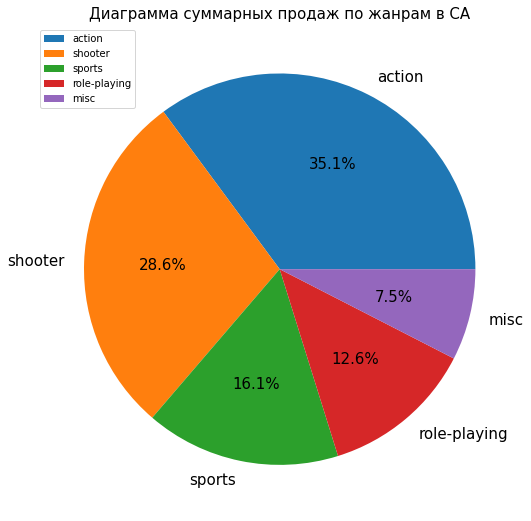

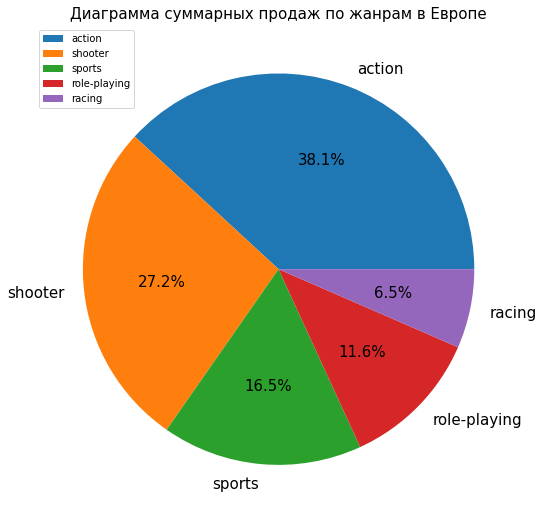

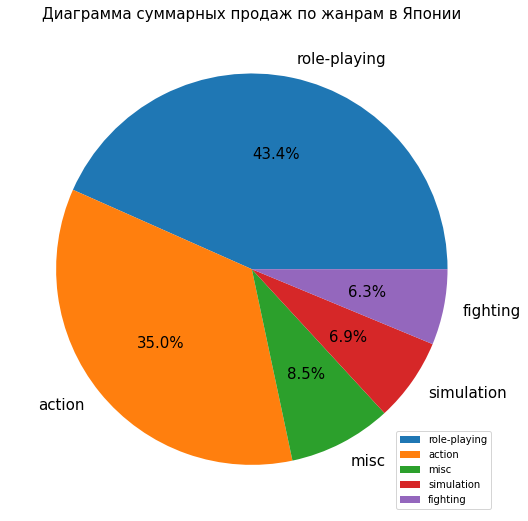

In [86]:
#Построение круговой диаграммы для СА:
(actual_data
    .pivot_table(index='genre', values='na_sales', aggfunc='sum')
    .sort_values(by='na_sales', ascending=False)
    .head(5)
    .plot(kind='pie', figsize=(9,9), autopct='%1.1f%%', fontsize=15, subplots=True)
    )
plt.title('Диаграмма суммарных продаж по жанрам в СА', size=15)
plt.ylabel('')

#Построение круговой диаграммы для Европы:
(actual_data
    .pivot_table(index='genre', values='eu_sales', aggfunc='sum')
    .sort_values(by='eu_sales', ascending=False)
    .head(5)
    .plot(kind='pie', figsize=(9,9), autopct='%1.1f%%', fontsize=15, subplots=True)
    )
plt.title('Диаграмма суммарных продаж по жанрам в Европе', size=15)
plt.ylabel('')

#Построение круговой диаграммы для Японии:
(actual_data
    .pivot_table(index='genre', values='jp_sales', aggfunc='sum')
    .sort_values(by='jp_sales', ascending=False)
    .head(5)
    .plot(kind='pie', figsize=(9,9), autopct='%1.1f%%', fontsize=15, subplots=True)
    )
plt.title('Диаграмма суммарных продаж по жанрам в Японии', size=15)
plt.ylabel('')
plt.show()

Жанры предпочитаемые в Северной Америке и Европе - совпадают по рейтенгу и продажам. В Японии же на первое место выбиваются **role-playing**, вытесняя **action** на второе место. Категория разное (**misc**) занимает третье место, к примеру в штатах это 5-ое место, а в Европе данный жанр даже не вошел в топ5.

> Данные по СА и Европе в плане жанров - почти идентичны (топ продаж наблюдается в одинаковых жанрах)

> В Японии первое место занимают ролевые игры, которые в СА и Европе находятся на 4-ом месте. Также есть категория симуляторов и боев, которых нету в топ 5 рейтенгов СА и ЕУ.

#### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

Сначала нужно описать категории рейтенгов, всего их **5 видов**, а именно:

- [x] **M** - для взрослых. «Mature» — «Для взрослых»: Материалы игры не подходят для лиц младше 17 лет.  
- [x] **E** - для всех.  «Everyone» — «Для всех»: Содержание вполне подходит для всех возрастов
- [x] **E10+** - для всех от 10 лет. «Everyone 10 and older» — «Для всех от 10 лет и старше»   
- [x] **T** - для подростков.  «Teen» — «Подросткам»: Игра подходит для лиц от 13 лет. 
- [x] **RP** - рейтенг ожидается. «Rating Pending» — «Рейтинг ожидается»: Продукт был отправлен в ESRB и ожидает присвоения рейтинга. 

- **Рейтинг ESRB в Америке:**

In [62]:
actual_data.groupby('rating')['na_sales'].sum().sort_values(ascending=False)

rating
M       231.57
E       114.37
RP      103.31
E10+     75.70
T        66.02
Name: na_sales, dtype: float64

- **Рейтинг ESRB в Европе:**

In [63]:
actual_data.groupby('rating')['eu_sales'].sum().sort_values(ascending=False)

rating
M       193.96
E       113.02
RP       91.50
E10+     55.37
T        52.96
Name: eu_sales, dtype: float64

- **Рейтинг ESRB в Японии:**

In [64]:
actual_data.groupby('rating')['jp_sales'].sum().sort_values(ascending=False)

rating
RP      108.84
E        28.33
T        26.02
M        21.20
E10+      8.19
Name: jp_sales, dtype: float64

**Визуализируем полученную информацию:**

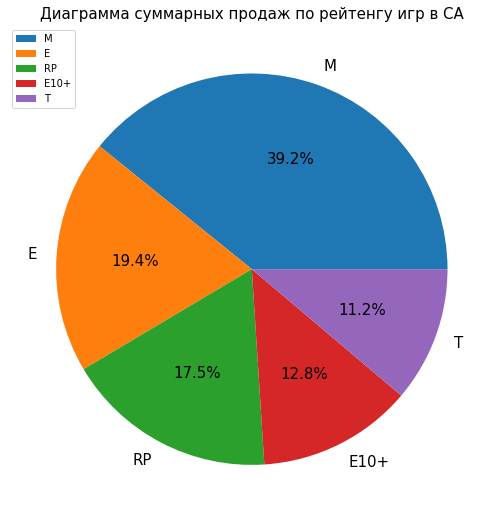

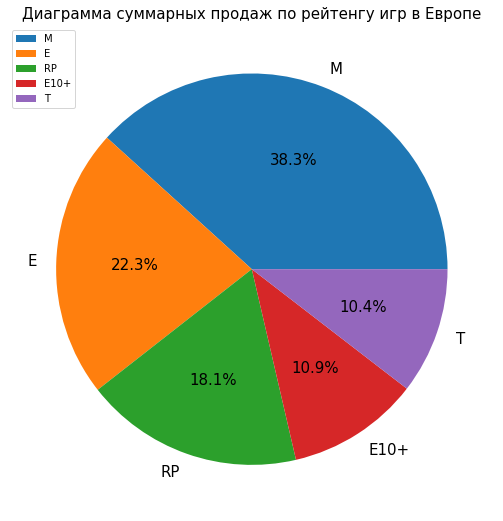

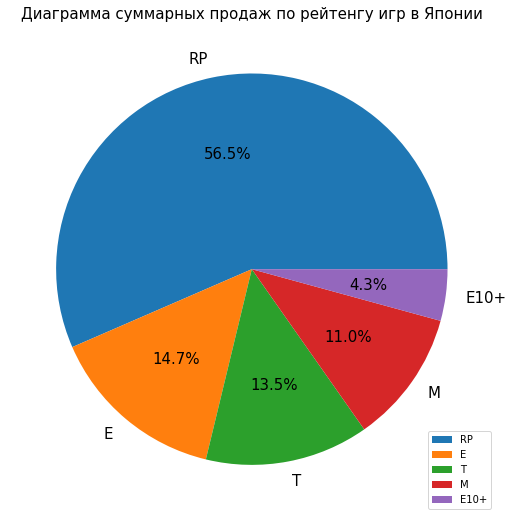

In [88]:
#Построение круговой диаграммы для СА:
(actual_data
    .pivot_table(index='rating', values='na_sales', aggfunc='sum')
    .sort_values(by='na_sales', ascending=False)
    .head(5)
    .plot(kind='pie', figsize=(9,9), autopct='%1.1f%%', fontsize=15, subplots=True)
    )
plt.title('Диаграмма суммарных продаж по рейтенгу игр в СА', size=15)
plt.ylabel('')

#Построение круговой диаграммы для Европы:
(actual_data
    .pivot_table(index='rating', values='eu_sales', aggfunc='sum')
    .sort_values(by='eu_sales', ascending=False)
    .head(5)
    .plot(kind='pie', figsize=(9,9), autopct='%1.1f%%', fontsize=15, subplots=True)
    )
plt.title('Диаграмма суммарных продаж по рейтенгу игр в Европе', size=15)
plt.ylabel('')

#Построение круговой диаграммы для Японии:
(actual_data
    .pivot_table(index='rating', values='jp_sales', aggfunc='sum')
    .sort_values(by='jp_sales', ascending=False)
    .head(5)
    .plot(kind='pie', figsize=(9,9), autopct='%1.1f%%', fontsize=15, subplots=True)
    )
plt.title('Диаграмма суммарных продаж по рейтенгу игр в Японии', size=15)
plt.ylabel('')
plt.show()

Итак, мы вывели все категории, посмотрим какие преобладают в различных регионах:

> В СА и Европе преобладают жанры игр для **взрослых** (М). На втором месте **для всех** (Е). На третьем месте игры, рейтинг  которых еще не оценили

> В Японии топ 1 по рейтенгу **ESRB** занимают игры **RP** - рейтенг которых не оценили. Это может склонять к тому, что люди играют в них в момент релиза, до того, как им присвоят определенную оценку. На втором месте категория **для всех** (Е). На третьем месте игры **для подростков** (Т)

**Рейтинг влияет на продажи, игры различных возрастных категорий по разному продают в различных регионах**

**Теперь, когда у нас есть все необходимые данные, составим портрет пользователя каждого региона:**

> *Портрет пользователя Северной Америки за последние 4-е года:*

- Самая **популярные платформы**: **x360**, **ps4**, **ps3**, **xone**, **3ds** (от топ 1  ---> к топ 5)

---

- Самые **популярные жанры**: **action**, **shooter**, **sports**, **role-playing**, **misc**

---

- Возрастной рейтенг: преобладает **M** и **E**

---

> *Портрет пользователя Европы за последние 4-е года:*

- Самая популярные платформы: **ps4**, **ps3**, **x360**, **xone**, **3ds** (от топ 1  ---> к топ 5)

---

- Самые популярные жанры: **action**, **shooter**, **sports**, **role-playing**, **racing**

---

- Возрастной рейтенг: преобладает **M** и **E**

---

> *Портрет пользователя Японии за последние 4-е года:*

- Самая популярные платформы: **3ds**, **ps3**, **psv**, **ps4**, **wiiu** (от топ 1  ---> к топ 5)

---

- Самые популярные жанры: **role-playing**, **action**, **misc**, **simulation**, **fighting**

---

- Возрастной рейтенг: преобладает **RP** и **E**

<a id='section_5'></a>

### Шаг №5.  Проверка гипотез

#### Гипотеза №1

- **Нулевая гипотеза:** 

> H0: Средние пользовательские рейтинги платформ ***XOne*** и ***PC*** равны

$$H_0: \overline{R_с}(xone)=\overline{R_с}(pc)$$ 
 
- **Альтернативная гипотеза:**

> H1: Средние пользовательские рейтинги платформ ***XOne*** и ***PC*** не равны

$$H_1: \overline{R_с}(xone)\neq\overline{R_с}(pc)$$

Определим зависимы ли данные выборки между собой, определим **размер и диссперсию выборок**:

In [65]:
#Общая информация по выборке оценки пользователя к платформам Xone:
xone = actual_data.query('platform=="xone" and user_score>0') # user_score>0  (nan - обрабатывается без этого среза)
#размер выборки:
xone['user_score'].count()

182

In [66]:
#Дисперсия выборки:
(xone['user_score'].std())**2

1.9069968429360693

In [67]:
#Общая информация по выборке оценки пользователя к платформам PC:
pc = actual_data.query('platform=="pc" and user_score>0')
#размер выборки:
pc['user_score'].count()

206

In [68]:
#Дисперсия выборки:
(pc['user_score'].std())**2

2.770443997158418

Данные выборки имеют разный размер и разную диссперсию, поэтому можно сказать, что они - **независимые**.

Зададим уровень статистической значимости - **5%**. Мы рассматриваем две независимые выборки между собой с разным размером. Поэтому для проверки гипотезы мы используем *t-тест independent* - для независимых выборок.

In [69]:
alpha = .05 # уровень статистической значимости

results = st.ttest_ind(xone['user_score'], pc['user_score'], equal_var=False, alternative='two-sided') 
#two-sided - проверка в обе стороны.

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу') 

p-значение: 0.5489537965134912
Не отвергаем нулевую гипотезу


**Отвергнуть нулевую гипотезу не получилось, значит рейтенги платформ Xone и Pc равны, при уровне статистической значимости 5%.**

#### Гипотеза №2

- **Нулевая гипотеза:** 

> H0: Средние пользовательские рейтинги жанров ***Action*** и ***Sports*** равны

$$H_0: \overline{R_c}(action)=\overline{R_c}(sports)$$ 
 
- **Альтернативная гипотеза:**

> H1: Средние пользовательские рейтинги жанров ***Action*** и ***Sports*** не равны

$$H_1: \overline{R_c}(action)\neq\overline{R_c}(sports)$$

Определим зависимы ли данные двух выборок между собой, определим **размер и диссперсию выборок**:

In [70]:
#Общая информация по выборке оценки пользователя к жанру action:
action = actual_data.query('genre=="action" and user_score>0')
#Определим размер выборки:
action['user_score'].count()

523

In [71]:
#Определим диссперсию выборки:
(action['user_score'].std())**2

1.8890840494348111

In [72]:
#Общая информация по выборке оценки пользователя к жанру action:
sport = actual_data.query('genre=="sports" and user_score>0')
#Определим размер выборки:
sport['user_score'].count()

194

In [73]:
#Определим диссперсию выборки:
(sport['user_score'].std())**2

3.038542812883927

Данные выборки имеют разный размер и разную диссперсию, поэтому можно сказать, что они - **независимые**.

Зададим уровень статистической значимости - **5%**. Мы рассматриваем две независимые выборки между собой с разным размером. Поэтому для проверки гипотезы мы используем *t-тест independent* - для независимых выборок.

In [74]:
alpha = .05 # уровень статистической значимости

results = st.ttest_ind(action['user_score'], sport['user_score'], equal_var=False, alternative='two-sided') 
#two-sided - проверка в обе стороны.

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу') 

p-значение: 5.989458066467418e-20
Отвергаем нулевую гипотезу


**Отвергаем нулевую гипотезу, выступает альтернативная. Можно утверждать, что средние пользовательские рейтинги жанров *Action* и *Sports* не равны, при уровне статистической значимости 5%.**

<a id='section_6'></a>

### Шаг №6.  Общий вывод

**1. На первом шаге была выгружена и изучена общая информация**

- Имеется датафрейм с данными о продажах игр в различных регионах

- В датафрейме хранится **16715 строк**

- Информация в дф: названия игр, платформа, жанр, год релиза, продажи, оценки пользователей/критиков

Сделали первичный осмотр и умозаключения по данным, которые задали вектор направления нашего анализа.

---

**2. На втором шаге была выполнена предобработка данных**

- Изменили названия столбцов и типы данных.

- Привели строковые значения к нижнему регистру

- Удалили пропуски, где это было возможно.

- Потеряли **1.63%** от исходного объема данных, что допустимо. (Оптимально 5-10%)

В данных оказалость порядка 300-а пропусков в разделах с годом реализации, названием игры и жанром, т.к. эти данные знамали слишком малую долю от общих данных, было принято решения удалить их. Объем потерь составил 1.63%

Также следует сказать, что основная масса пропусков была в столбцах с оценками критика, пользователя и рейтенгом ESRB. доля пропусков в этих данных составляла порядка 50% на каждый столбец. Заменть данные значения медианной или средним - не релевантно, т.к. пропусков слишком много. Было принято решения, оставить данные значения без изменения.

- Определили, что явных дубликатов - **нет**.

- Нашли один неявный дубликат и удалили.

- Подсчитали суммарные продажи со всех регионов для конкретной игры (*all_sales*)

Для удобства работы и интерпритации данных был добавлен дополнительный столбец *all_sales* в датафрейм, в котором содержится результирующая сумма продаж копий со всех предстваленных регионов.

**Причины, которые могли привести к пропускам:**

> Данные выгружались с различных платформ, поэтому пересечение различных типов могло в последсвии привести к пропускам

Стоит обратить внимание на качество выгружаемых данных с различных платформ, потому что количество битых ячеек в данных очень большое, возможно стоит собирать и обрабатывать информацию по какому-то определенному формату или закономерности, во избежание дальнейших ошибок.

---

**3. Провели исследовательский анализ данных**

- Построили график зависимости количества выпущенных игр от года релиза

Основные положения взятые из графика:

> Интервал выпуска игр **1980-2016** (данные за этот период)

> Начиная с 1993 года по 2009 год - количество выпускаемых игр **увеличивается**

Увеличение выпускаемых игр как раз приходится на пик развития игровой индустрии.

> C 2009 по 2016 год - количество выпускаемых игр начинает **сокращаться**

- Определили топ игровых платформ по продажам за все время

> Топ 6 игровых платформ по продажам за весь период: ***ps2, x360, ps3, wii, ds, ps***

- Оценили как менялись продажи в зависимости от платформ за определенные временные интервалы. Исходя из этих данных определили **среднее время жизини платформы и спрогнозировали перспективные платформы**

> Среднее время жизни платформы - **10 лет**

Среднее время жизни для выбранных платформ варьировалось в интервале от 9 до 11 лет, из среднего арифметического было принято решение взять Среднее время жизни для платформ - 10 лет.

> Продажи платформ растут в течении **4 лет** после релиза, дальше идут на спад

По полученным данным рост количества продаж у отдельних платформ лежит в интервале 3-5 лет после релиза этой платформы. Следовательно необходимо смотреть данные за последние 3-5 лет, если мы хотим спрогнозировать ситуацию на рынке.

> **Актуальный период** - последние 4 года (по данным), за этот промежуток времени можно оценить и спрогнозировать продажи каких платформ будут расти

> Спрогнозировали перспективные платформы: ***ps4*** и ***xone***

- **Построили боксплоты**, по которым оценили разброс значений для конкретных платформ и их выбросы

- Проанализировали взаимосвязь оценок пользователя/критика и продаж для актуального периода. Сделали выводы о том, что **оценка средне влияет на продажи**. Коэффициент корреляции лежит в интервале от **0.3 - 0.4** для параметров: оценка критика и продажи. В случае с оценкой пользователя и продажами, корреляция очень мала - взаимосвязи **нет**.

- За Актуальный период самые **популярные жанры** по суммарным продажам игр это: **action**, **shooter**, **sports**, **role-playing**

На суммарные продажи большое влияние могут оказывать продажи игр бестселлеров, поэтому была проведена аналитика для средних и медианных суммарных продаж:

> По средним и медианным суммарным продажам, самые популярные жанры: **shooter, platform, sports, role-playing, racing**

Подводя итоги по данному разделу, можно сказать, что анализ лучше проводить в последние четыре года. Продажи почти не зависят от оценки пользователей, в то время как от оценки критиков наблюдается взаимосвязь. Т.е. люди ориентируются на оценки критиков в большей степени, чем на оценки пользователей. Возможно, данную проблему можно решить путем улучшения системы оценок, чтобы люди в большей степени доверяли и ссылались на них, при совершении игровых покупок.

---

**4. Составили среднестатистический портрет пользователя для различных регионов**

> *Портрет пользователя Северной Америки за последние 4-е года:*

- Самая **популярные платформы**: **x360**, **ps4**, **ps3**, **xone**, **3ds** 

---

- Самые **популярные жанры**: **action**, **shooter**, **sports**, **role-playing**, **misc**

---

- Возрастной рейтенг: преобладает **M** и **E**

---

> *Портрет пользователя Европы за последние 4-е года:*

- Самая популярные платформы: **ps4**, **ps3**, **x360**, **xone**, **3ds** 

---

- Самые популярные жанры: **action**, **shooter**, **sports**, **role-playing**, **racing**

---

- Возрастной рейтенг: преобладает **M** и **E**

---

> *Портрет пользователя Японии за последние 4-е года:*

- Самая популярные платформы: **3ds**, **ps3**, **psv**, **ps4**, **wiiu** 

---

- Самые популярные жанры: **role-playing**, **action**, **misc**, **simulation**, **fighting**

---

- Возрастной рейтенг: преобладает **RP** и **E**


Исходя из этих данных, можно сказать, что пользователи СА и Европы имеют достаточно схожие портреты. Игровые платформы, жанры и возрастной рейтенг в данных регионах почти **одинаковые**. В свою очередь портрет пользователя Японии **отличается** от СА и Европы. Другие популярные жанры и их позиции, также в возрастном рейтенге преобладает **RP** - игры с неопределенной возрастной оценкой. Скорей всего это игры, которые находятся на стадии **релиза**.

Количество рассмотренных регионов дастаточно маленькое, кончено, мы рассмотрели трех гигантов рынок которых в игровой индустрии занимает большую долю, но также можно увеличить количество исследуемых регионов, или дискретизировать параметр "Другие продажи", который будет учитывать продажи в других регионах, что даст более точную модель для проведения исследования и создания портретов пользователей других регионов.

**5. Проверили гипотезы**

Исходя из результатов ***t-тестов*** для независимых выборок, было установлено, что:

> Рейтенги платформ ***Xone*** и ***Pc*** **равны**, при уровне **статистической значимости 5%.**

> Cредние пользовательские рейтинги жанров ***Action*** и ***Sports*** **не равны**, при уровне **статистической значимости 5%.**